<a href="https://colab.research.google.com/github/RWLab/.github/blob/main/techniques/4%20-%20What%20Else%20Would%20Explain%20This.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Else Would Explain This

This notebook accompanies this lesson: https://robotwealth.com/courses/alpha-trading-workshop/lessons/simple-data-analysis-patterns-in-the-lab/topic/what-else-would-explain-this/



# Get Raw Data

In [50]:
# snippet: rw load rwrtools v0.5

# This is an efficient way to: 
  # install necessary packages (both those that you will use directly, and those that are dependencies)
  # load the ones you want to use in your session

# This snippet works by installing as many packages and dependencies using `apt-get` as possible, which is much faster than using install.packages()
# If not loading rsims, this should take around 50 seconds. If loading rsims, it should take around 60s.

# User Instructions:
  # IN MOST USE CASES, YOU WON'T HAVE TO MODIFY ANYTHING - just run this code block as is.
  # parts of this snippet that the user can modify are highlighted.
  # IF YOU WANT TO USE RSIMS: uncomment the bits that install and load rsims and its dependencies.
  # IF YOU WANT TO USE LIBRARIES THAT AREN'T SPECIFIED IN THE libs_to_load VECTOR BELOW, follow these instructions:
    # specify the libraries you want to use in your research session in the libs_to_load vector.
    # specify as many of the dependecies of these libraries as you like in the other_dependencies vector - the more you are able to specify, the quicker your installation process will be.
    # it doesn't matter if there are double-ups between your other_dependencies and rwRtools_dependencies - the snippet does a check for uniqueness prior to starting the installation process.  
    # it also doesn't matter if you miss some dependencies as these will be picked up during the installation process (albeit they'll be installed slower than they otherwise would).
  # IF SOMETHING GOES WRONG: 
    # ... with installing libraries other than rsims and rwRtools, debug the install process by inspecting the msg2 object, which holds the output of the apt install process.
    # ... with the installation of rsims or rwRtools, change the calls to p_load_current_gh such that dependencies = TRUE (this will be much slower, but will catch any libraries 
      # that were missed upstream, for example if rwRtools had dependencies added later that aren't captured in the default list.)
    # if you get stuck, ask on Slack!

# How to figure out a package's dependencies? Use available.packages(). Example for getting the packages that patchwork depends upon:
# pkgs <- available.packages()
# pkgs["patchwork","Imports"]

# rwRtools dependencies (install but don't load) 
rwRtools_dependencies <- c(
  "pillar", "tibble", "rlang", "httr", "iterators", "zoo", "R.methodsS3", "callr", "foreach", 
  "xts", "stringi", "Rcpp", "R.oo", "gargle", "googleAuthR", "glue", 
  "googleCloudStorageR", "R.utils", "feather", "lubridate", "readr", "stringr", 
  "dplyr", "purrr", "magrittr", "TTR", "doParallel"
)

# libraries to load (install and load) 
##################################################
##### USER ADDS LIBRARIES TO BE LOADED HERE ######
##################################################
libs_to_load <- c("dplyr", "tidyr", "ggplot2", "lubridate", "purrr", "glue", "stringr", "roll")

# dependencies (install but don't load) 
##################################################
##### USER ADDS DEPENDENCIES HERE ################
##################################################
other_dependencies <- c(
  "generics", "lifecycle", "R6", "rlang", "tidyselect", "vctrs", "pillar", 
  "ellipsis", "digest", "gtable", "isoband", "MASS", "mgcv", "scales", "withr", 
  "stringi", "pacman", "iterators", "R.methodsS3", "openssl", "foreach", "xts", 
  "R.oo", "RcppArmadillo", "slam", "timeDate", "cccp", "Rglpk", "timeSeries",
  "tibble", "tidyr", "here", "roll", "Rcpp"
)

##################################################
#### UNCOMMENT NEXT TWO LINES IF USING RSIMS #####
##################################################
# rsims_dependencies <- c("ggplot2", "lubridate", "roll", "Rcpp")
# other_dependencies <- c(other_dependencies, rsims_dependencies)

# capitalisation of call to CRAN may not always match capitalisation of package name (eg library(doParallel) vs sudo apt install r-cran-doparallel).
install_from_cran <- gsub("^(?!R\\.)([\\w]+)", "\\L\\1", unique(c(libs_to_load, other_dependencies, rwRtools_dependencies)), perl = TRUE)  # convert to lowercase all letters other than an "R" at the start followed by "."

msg1 <- system2('sudo', args = c('apt-get', 'update'),
  stdout = TRUE,
  stderr = TRUE,
  wait = TRUE
)

msg2 <- system2(
  'sudo', 
  args = c('apt', 'install', sub('', 'r-cran-', install_from_cran, '-y --fix-missing')),
  stdout = TRUE,
  stderr = TRUE,
  wait = TRUE
)

pacman::p_load(char = libs_to_load, install = FALSE)

# install and load rwRtools from GH (sans dependencies)
pacman::p_load_current_gh("RWLab/rwRtools", dependencies = FALSE)

# install and load rsims from GH (sans dependencies) 
###################################################
###### UNCOMMENT NEXT LINE IF USING RSIMS #########
###################################################
# pacman::p_load_current_gh("Robot-Wealth/rsims", dependencies = FALSE)

# output messages from install - optional, for debugging 
#########################################################
## UNCOMMENT NEXT LINE TO DEBUG INSTALL PROCESS #########
#########################################################
# msg2

# Set chart options
options(repr.plot.width = 14, repr.plot.height=7)
theme_set(theme_bw())
theme_update(text = element_text(size = 20))

In [2]:
# snippet: rw data auth v.0.1
rwlab_data_auth()

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-0l5tra7gl2i20iftqangp7iskte4f3s0.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1ARtbsJrRltNTP_wsZZGqUjIURyRDgYnEaJULHZoyoKgcVHfnCVGpHFO9aQA


In [3]:
# snippet: rw ef quickstart v.0.1
quicksetup(pod = "EquityFactors", path = ".")
prices %>% 
  head()

Set default bucket name to 'equity_factors_research_pod'



Attempting download of  R1000_ohlc_1d.feather ...
Transferring R1000_ohlc_1d.feather ... data is 696.8 Mb please be patient...


ℹ Downloading R1000_ohlc_1d.feather

✔ Saved R1000_ohlc_1d.feather to ./R1000_ohlc_1d.feather  ( 696.8 Mb )





R1000_ohlc_1d.feather successfully transferred
prices data object transferred and loaded as data.frame to Global Env


ticker,date,open,high,low,close,unadjusted_close,volume,is_universe
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,1999-11-19,27.49898,27.53818,25.49600,25.97448,40.7500,17651124,0
A,1999-11-22,26.45670,28.06292,25.65617,28.06292,43.6250,7621462,0
A,1999-11-23,27.21810,27.94024,25.77714,25.77714,40.2500,6923638,0
A,1999-11-24,25.69854,26.85847,25.61682,26.29644,41.0625,5611738,0
A,1999-11-26,26.17872,26.57733,26.09701,26.37803,41.1875,2003892,0
A,1999-11-29,26.25728,27.17871,25.97626,26.97941,42.1250,4721318,0


For every stock that appeared in the Russell 1000 over the last 20 years I have one row  of OHLC price observations per trading day.
The OHLC close points are adjusted for splits and dividends
The unadjusted_close price is the close price it actually traded it.
If the stock didn't trade that day it has volume = 0
If the stock was not in the index on that day it has is_universe = 0

*   The OHLC close points are adjusted for splits and dividends
*   The unadjusted_close price is the close price it actually traded it.
* If the stock didn't trade that day it has volume = 0
* If the stock was not in the index on that day it has is_universe = 0


## Converting to Annual Observations



So we a get year end snapshot prices...

In [28]:
year_prices <- prices %>%
  inner_join(prices %>%
    mutate(year = lubridate::year(date)) %>%
    group_by(year) %>%
    summarise(date = max(date)), by = 'date') %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(returns = close / lag(close) - 1) %>%
  na.omit()
  

year_prices %>% head()

ticker,date,open,high,low,close,unadjusted_close,volume,is_universe,year,returns
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAI,1999-12-31,4.4377500,4.5000000,4.3750000,4.500000,4.5000,542735.00,0,1999,0.7142857
AAIC,1999-12-31,25.8725170,25.8725170,24.0433720,25.672881,7.8750,43865.72,0,1999,0.2119170
AAMRQ,1999-12-31,31.0883415,31.3494702,31.0883415,31.088341,67.0000,577038.80,1,1999,0.1284232
AAN1,1999-12-31,5.0647916,5.1924632,4.9916935,5.192463,17.7500,89686.23,0,1999,0.1748483
AAPL,1999-12-31,0.7763179,0.7910923,0.7651894,0.790852,102.8125,193066000.00,1,1999,1.5112808
AAWHQ,1999-12-31,27.6250000,27.6250000,27.1877500,27.437750,27.4375,34900.00,0,1999,-0.1590430


Now our data is just the last observations of the calendar year.

*(Note i can do this because t i know i don't have gaps in my data...we have integrity checks for that. that's important.)*

Buying stocks beginning with J

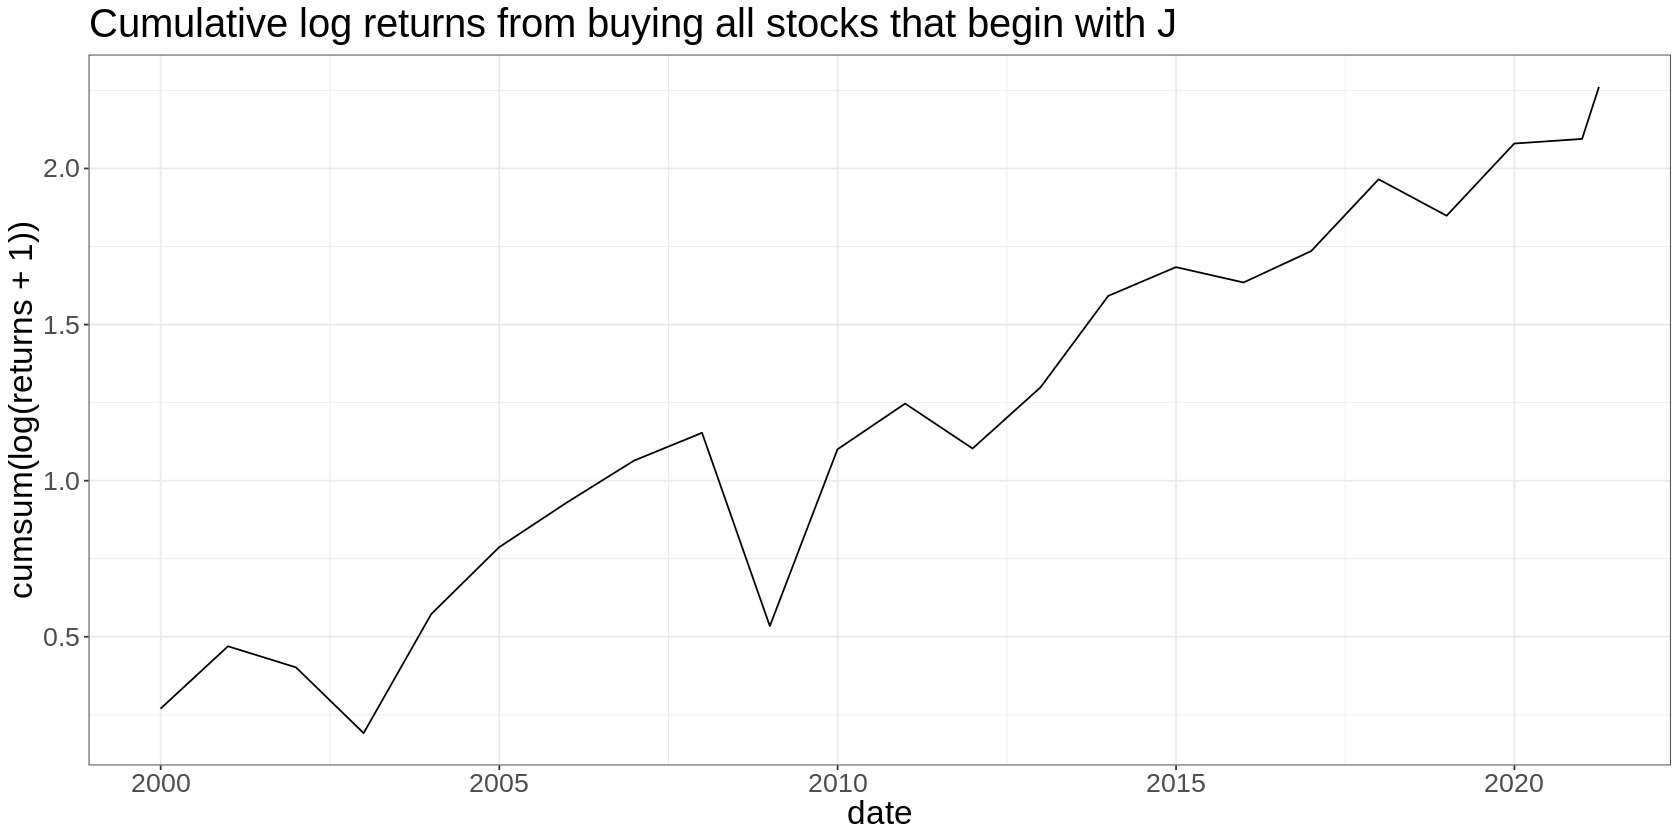

In [29]:
year_prices %>% 
  mutate(isJ = substr(ticker, 1, 1) == 'J') %>%
  filter(
    is_universe == 1,
    isJ) %>%
  group_by(date) %>%
  summarize(returns = mean(returns)) %>%
  ggplot(aes(x=date, y=cumsum(log(returns + 1)))) + geom_line() +
  ggtitle('Cumulative log returns from buying all stocks that begin with J')

Control for upward bias in the universe by subtracting the mean return from each observation

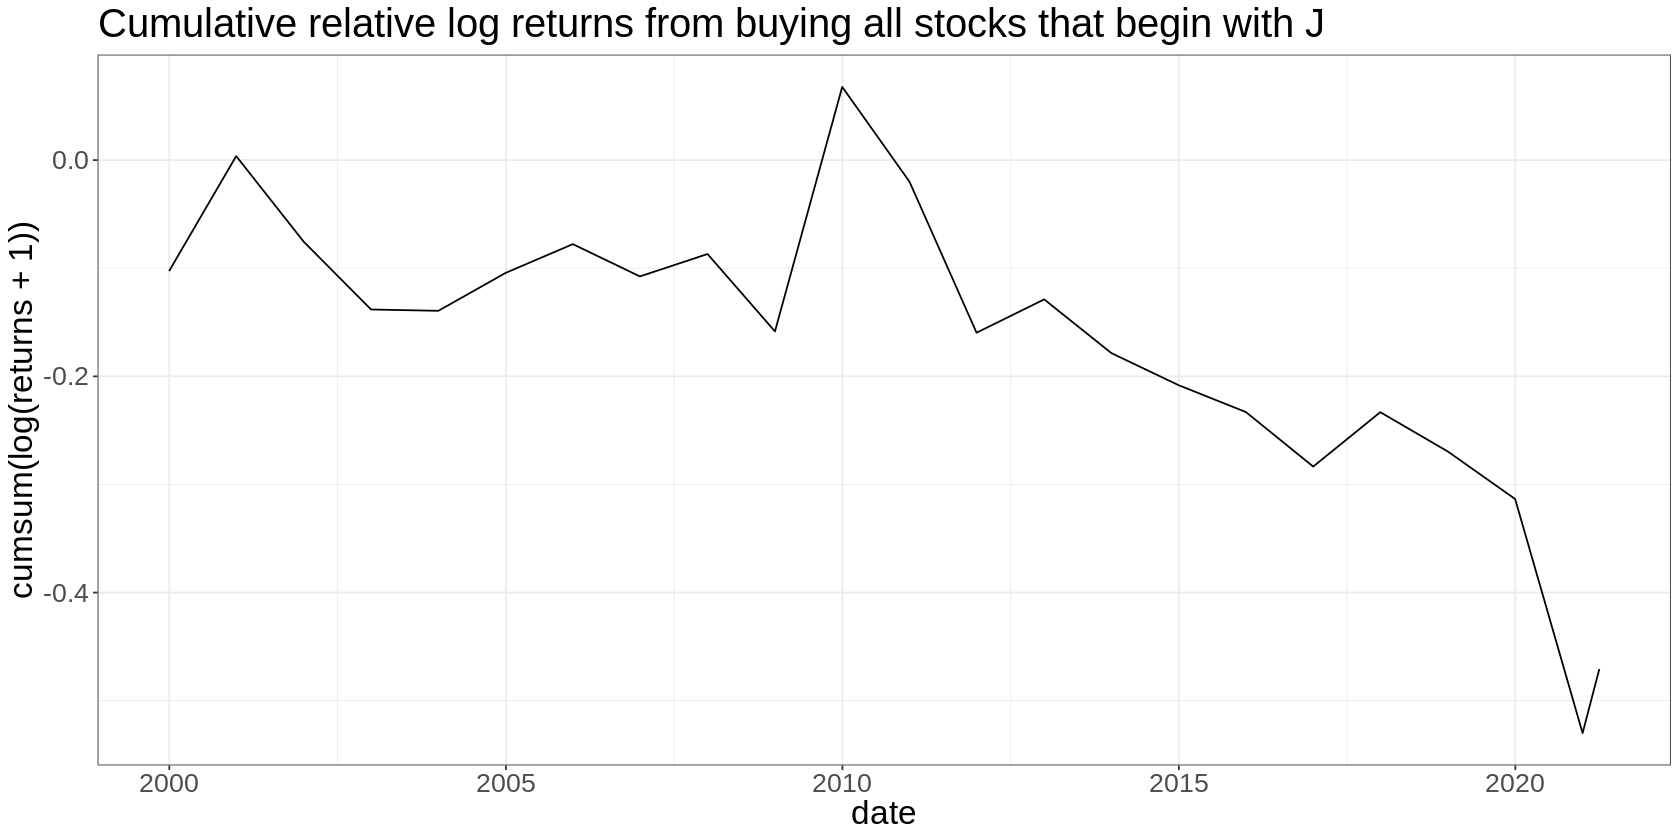

In [30]:
year_prices %>% 
  mutate(isJ = substr(ticker, 1, 1) == 'J') %>%
  filter(is_universe == 1) %>%
  group_by(date) %>% 
  mutate(demean_returns = returns - mean(returns)) %>%
  filter(isJ) %>%
  summarize(returns = mean(demean_returns)) %>%
  ggplot(aes(x=date, y=cumsum(log(returns+1)))) + geom_line() +
  ggtitle('Cumulative relative log returns from buying all stocks that begin with J')

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


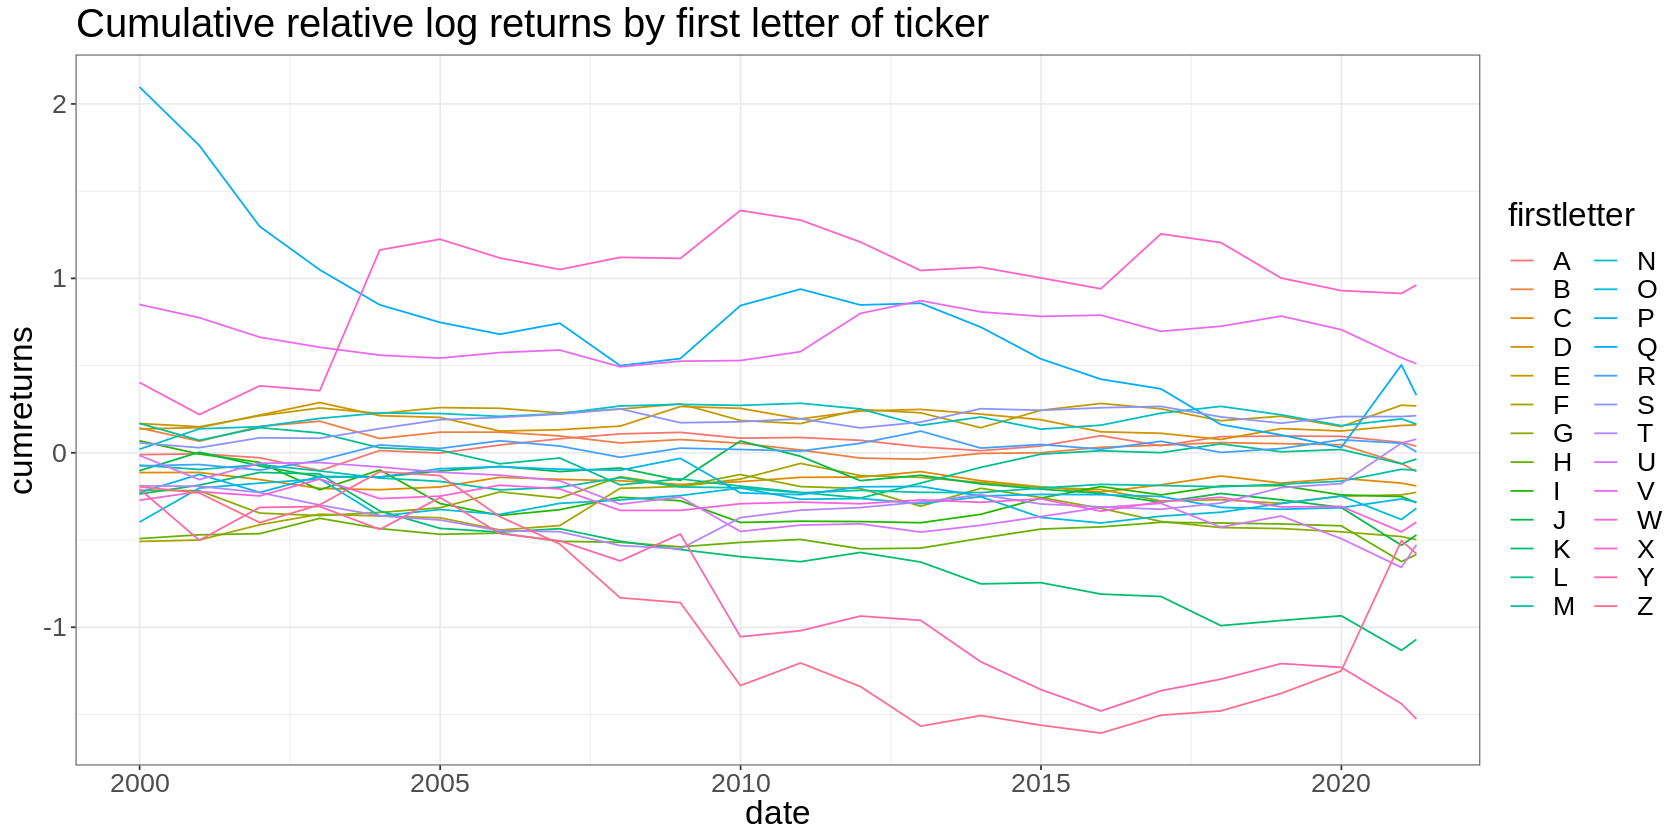

In [32]:
year_prices %>% 
  mutate(firstletter = substr(ticker, 1, 1)) %>%
  filter(is_universe == 1) %>%
  group_by(date) %>% 
  mutate(demean_returns = returns - mean(returns)) %>%
  group_by(date, firstletter) %>%
  summarize(returns = mean(demean_returns)) %>%
  group_by(firstletter) %>%
  arrange(date) %>%
  mutate(cumreturns = cumsum(log(returns + 1))) %>%
  ggplot(aes(x=date, y=cumreturns, color=firstletter)) + geom_line() +
  ggtitle('Cumulative relative log returns by first letter of ticker')

## Example: Opening Gap Reversal

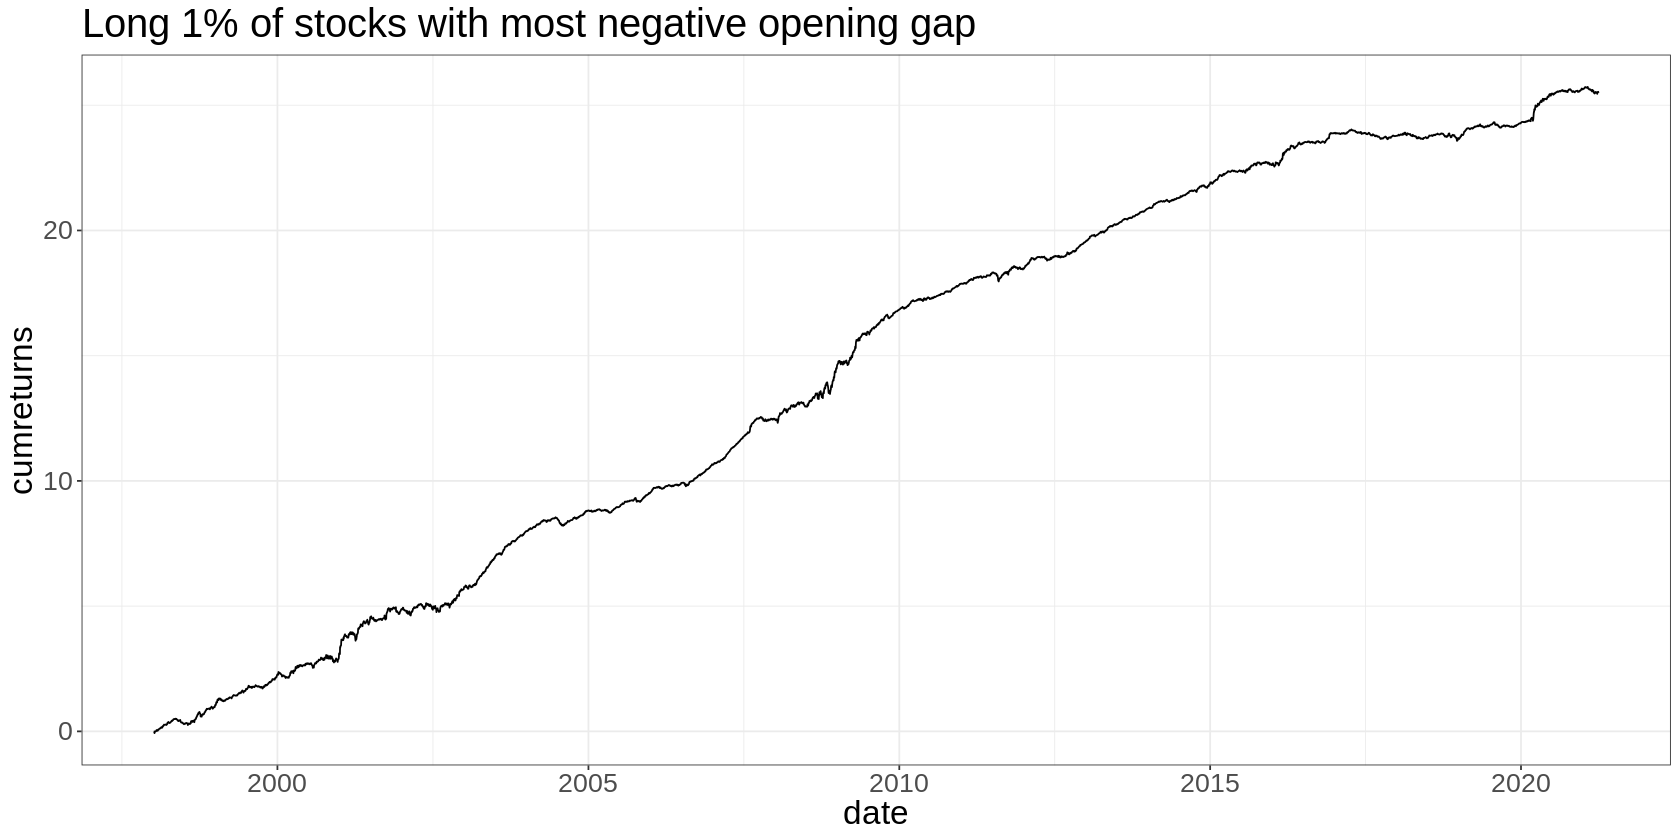

In [42]:
prices %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(
    gap = log(open/lag(close)),
    o2c = close / open - 1
  ) %>%
  na.omit() %>%
  filter(is_universe == 1) %>%
  group_by(date) %>%
  mutate(rank = ntile(gap, 100)) %>%
  filter(rank == 1)  %>%
  summarize(meanreturn = mean(o2c)) %>%
  arrange(date) %>%
  mutate(cumreturns = cumsum(log(meanreturn + 1))) %>%
  ggplot(aes(x=date, y=cumreturns)) + geom_line() + ggtitle('Long 1% of stocks with most negative opening gap')

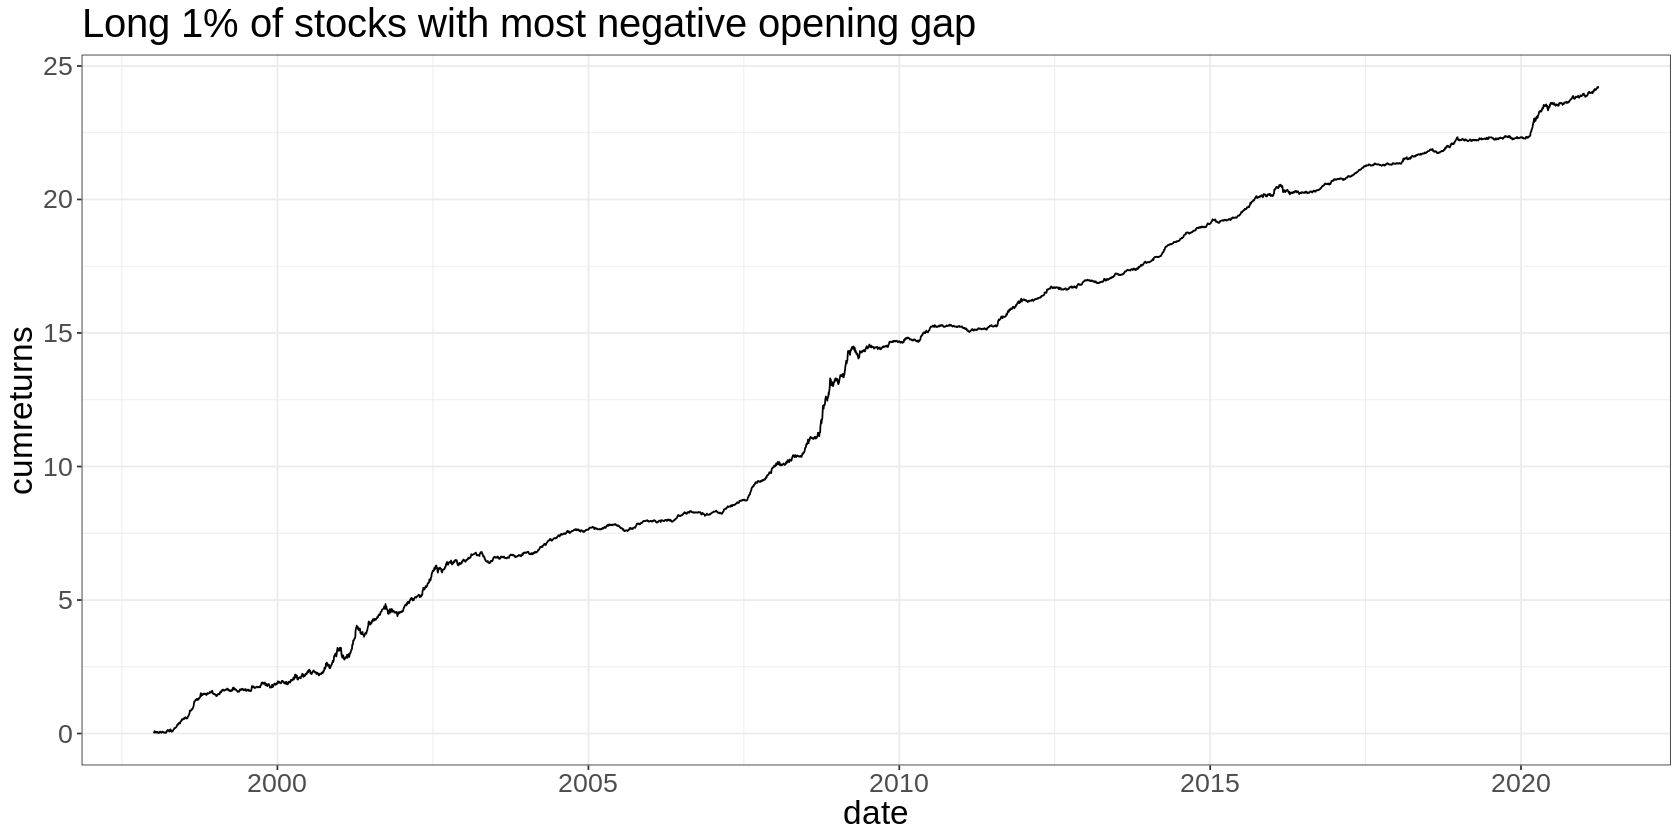

In [44]:
prices %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(
    gap = log(open/lag(close)),
    o2c = close / open - 1
  ) %>%
  na.omit() %>%
  filter(is_universe == 1) %>%
  group_by(date) %>%
  mutate(rank = ntile(gap, 100)) %>%
  filter(rank == 100)  %>%
  summarize(meanreturn = mean(-o2c)) %>%
  arrange(date) %>%
  mutate(cumreturns = cumsum(log(meanreturn + 1))) %>%
  ggplot(aes(x=date, y=cumreturns)) + geom_line() + ggtitle('Short 1% of stocks with most positive opening gap')

# Share Price Factor

Warning message:
“Removed 1 rows containing missing values (position_stack).”


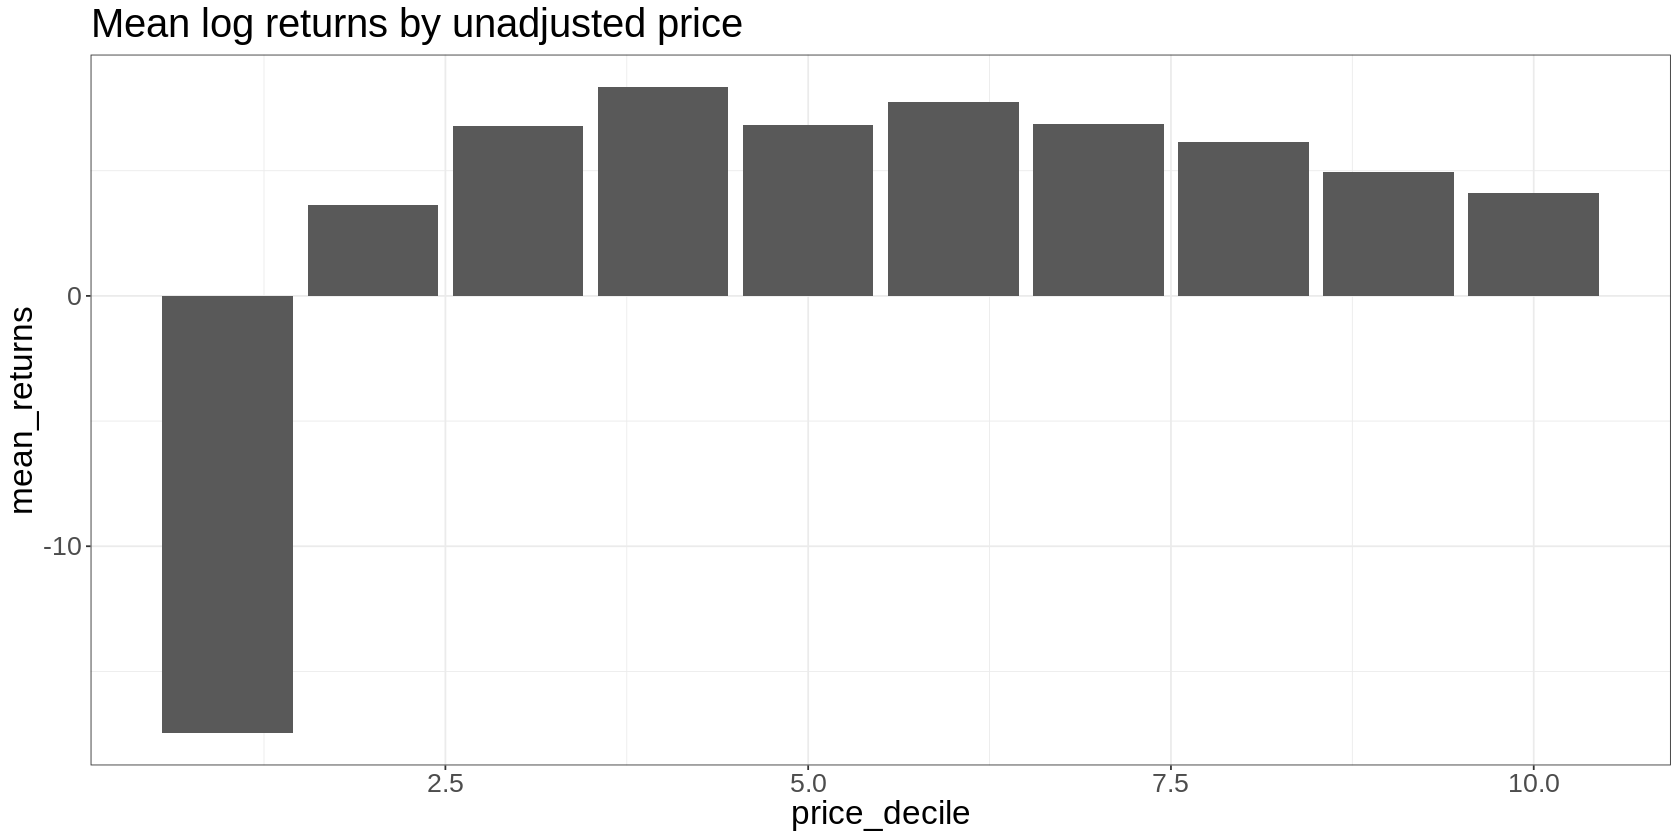

In [48]:
prices %>%
  group_by(date) %>%
  mutate(price_decile = ntile(unadjusted_close, 10)) %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(
    price_decile = lag(price_decile),
    returns = log(close / lag(close))
  ) %>%
  group_by(price_decile) %>%
  summarize(mean_returns = mean(returns) * 100 * 252) %>%
  ggplot(aes(x=price_decile, y=mean_returns)) + geom_bar(stat='identity') + ggtitle('Mean log returns by unadjusted price')


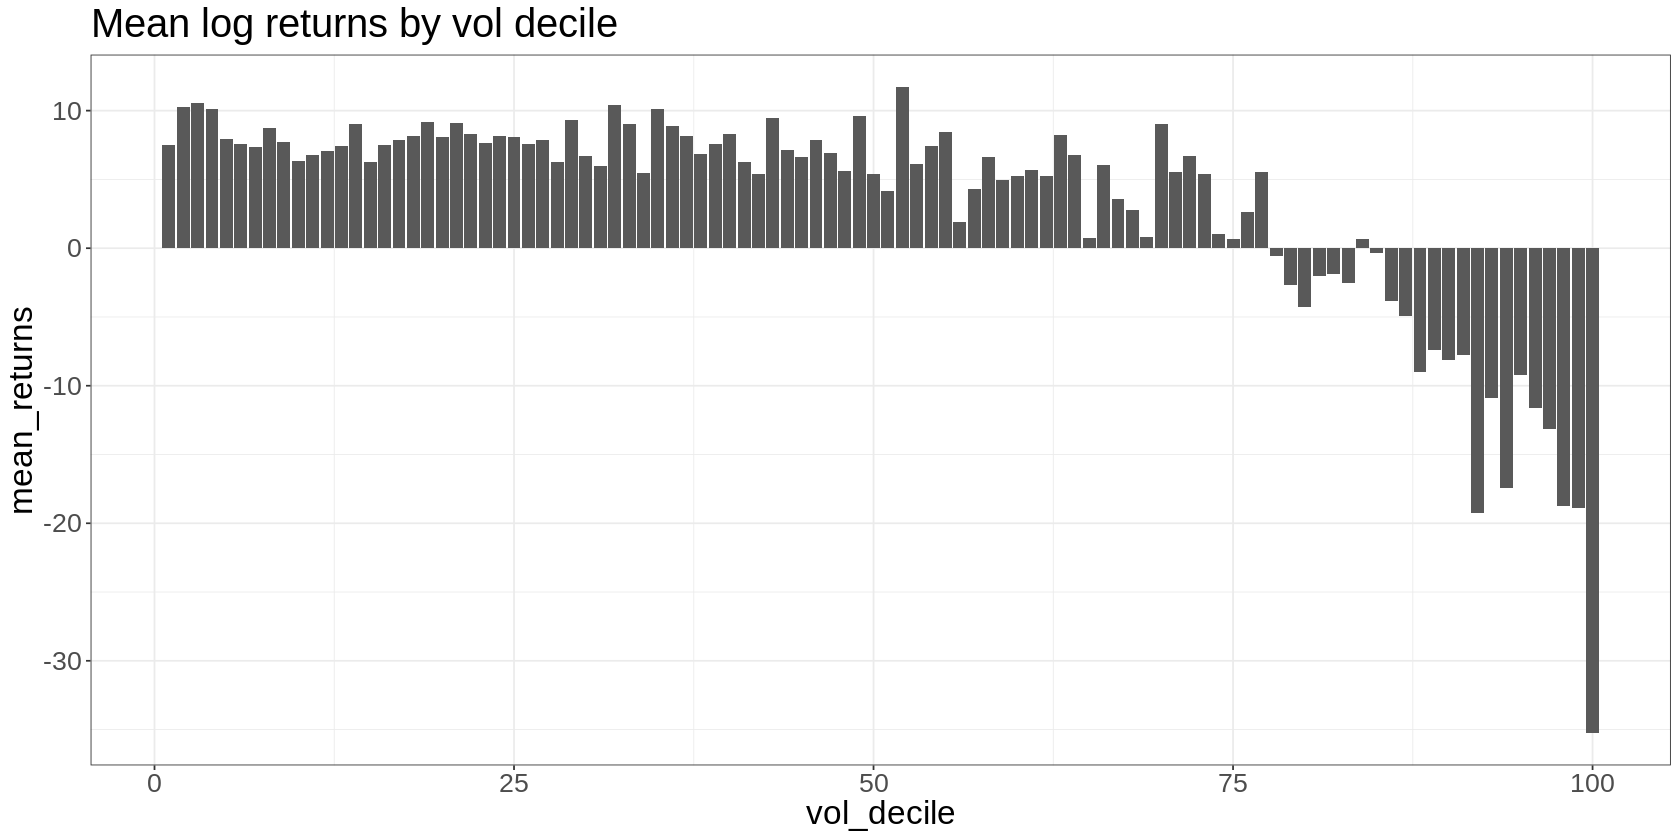

In [67]:
prices %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(
    returns = log(close / lag(close)),
    vol = roll_sd(returns, 22)) %>%
  filter(is_universe == 1) %>%
  group_by(date) %>%
  mutate(
    price_decile = ntile(unadjusted_close, 10),
    vol_decile = ntile(vol, 100)
  ) %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(
    price_decile = lag(price_decile),
    vol_decile = lag(vol_decile)
  ) %>%
  na.omit() %>%
  group_by(vol_decile) %>%
  summarize(mean_returns = mean(returns) * 100 * 252) %>%
  ggplot(aes(x=vol_decile, y=mean_returns)) + geom_bar(stat='identity') + ggtitle('Mean log returns by vol decile')


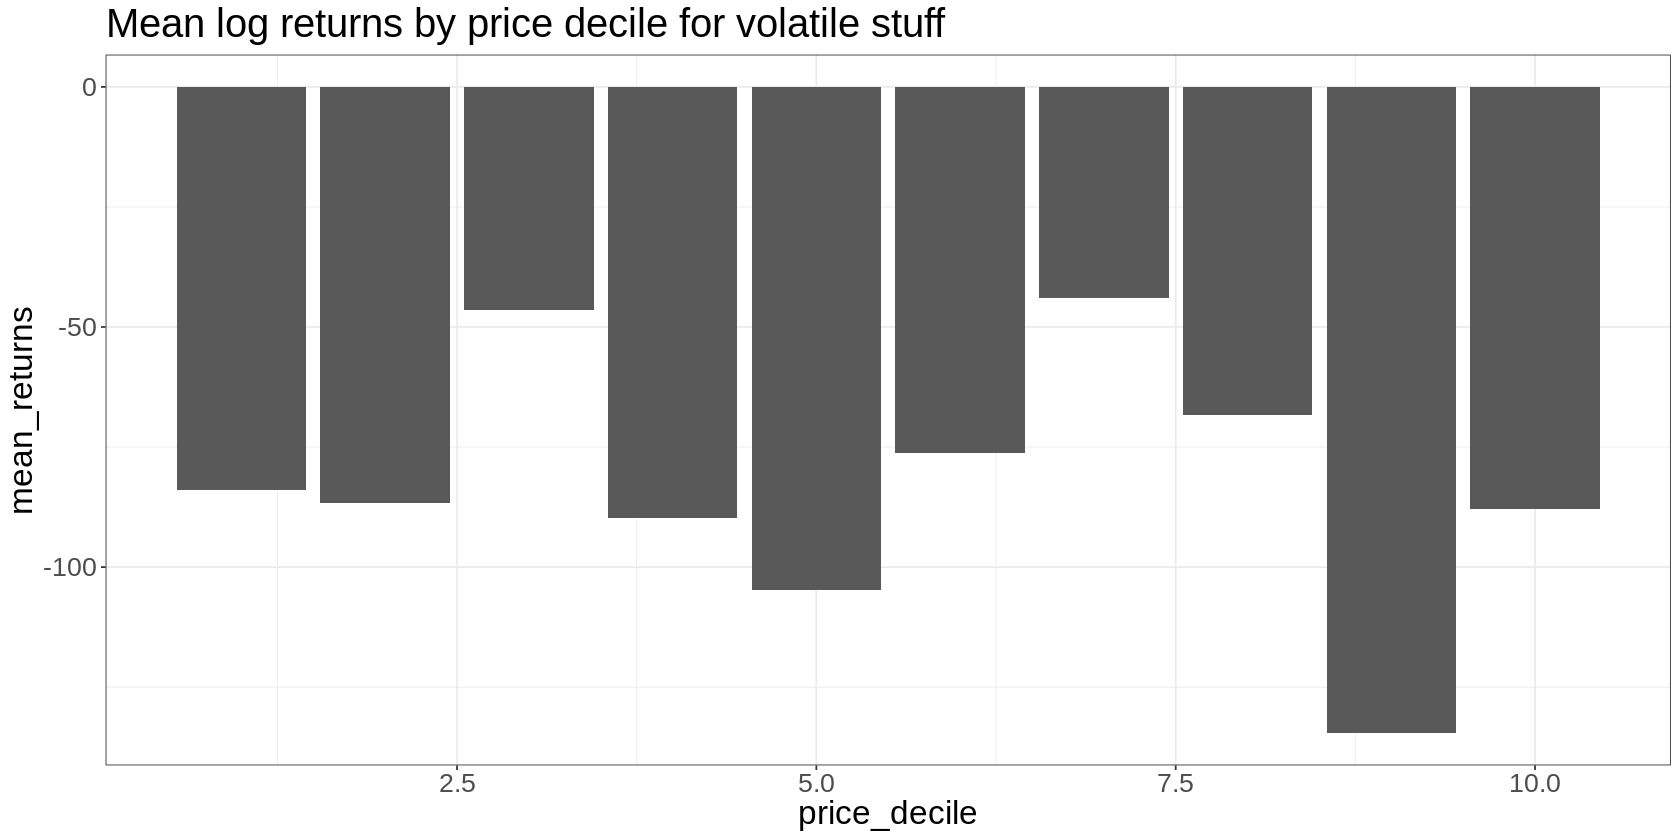

In [69]:
prices %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(
    returns = log(close / lag(close)),
    vol = roll_sd(returns, 22)
  ) %>%
  filter(is_universe == 1) %>%
  group_by(date) %>%
  mutate(
    vol_decile = ntile(vol, 100)
  ) %>%
  filter(vol_decile == 100) %>%
  group_by(date) %>%
  mutate(price_decile = ntile(unadjusted_close, 10)) %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(
    price_decile = lag(price_decile)
  ) %>%
  na.omit()  %>%
  group_by(price_decile) %>%
  summarize(mean_returns = mean(returns) * 100 * 252) %>%
  ggplot(aes(x=price_decile, y=mean_returns)) + geom_bar(stat='identity') + ggtitle('Mean log returns by price decile for volatile stuff')